<a href="https://colab.research.google.com/github/dganguli/tlon/blob/master/train_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import torch

import matplotlib.pyplot as plt

print("torch cuda is available: {}".format(torch.cuda.is_available()))
print("number of gpus: {}".format(torch.cuda.device_count()))
print("1st gpu is of type: {}".format(torch.cuda.get_device_name(0)))

torch cuda is available: True
number of gpus: 1
1st gpu is of type: Tesla P4


In [2]:
import sys
! git clone https://github.com/dganguli/tlon.git
%cd /content/tlon/
! git pull
sys.path.append('/content/tlon')

!pip install showit

Cloning into 'tlon'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 70 (delta 40), reused 43 (delta 20), pack-reused 0
Unpacking objects: 100% (70/70), done.
/content/tlon
Already up to date.


# Download MNIST training data

In [3]:
from data import load_mnist
from cnn import CNNTrainer

random_seed = 1
torch.manual_seed(random_seed)

train_loader, test_loader = load_mnist('/tmp')


Extracting /tmp/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/MNIST/raw



Extracting /tmp/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/MNIST/raw



Extracting /tmp/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/MNIST/raw



Extracting /tmp/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/MNIST/raw
Processing...
Done!


# Train a CNN on MNIST data

In [4]:
trainer = CNNTrainer(train_loader, test_loader, save_path='/tmp')

start = time.time()
trainer.train(log_interval=100)
elapsed = time.time()
total = elapsed-start
print("time elapsed: {} seconds".format(total))


Test set: Avg. loss: 2.3169, Accuracy: 1135/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.329414
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.266129
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.964775
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.494709
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.125933
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.888893
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.664678
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.653600
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.502370
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.378535

Test set: Avg. loss: 0.2433, Accuracy: 9289/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.489649
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.394803
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.387795
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.447119
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.196728
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.256128
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.465257
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.229

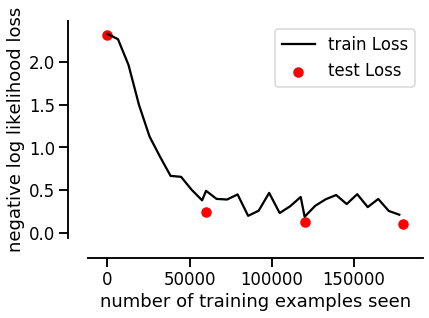

In [5]:
sns.set_context('talk')
fig = plt.figure()
plt.plot(trainer.train_counter, trainer.train_losses, 'k')
plt.scatter(trainer.test_counter, trainer.test_losses, color='r')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
sns.despine(offset=20)

# Train a cGAN to generate synthetic data

In [47]:
from cgan import CGANTrainer

trainer = CGANTrainer(train_loader, 
                      save_path='/content',
                      n_epochs=20
                      )

start = time.time()
trainer.train()
elapsed = time.time()
total = elapsed-start
print("time elapsed: {} seconds".format(total))

Sending models to gpu
[Epoch 0/20] [Batch 0/938] [D loss: 0.441215] [G loss: 0.980160]
[Epoch 1/20] [Batch 0/938] [D loss: 0.095302] [G loss: 0.513109]
[Epoch 2/20] [Batch 0/938] [D loss: 0.162445] [G loss: 1.086180]
[Epoch 3/20] [Batch 0/938] [D loss: 0.110111] [G loss: 0.433623]
[Epoch 4/20] [Batch 0/938] [D loss: 0.112170] [G loss: 0.518552]
[Epoch 5/20] [Batch 0/938] [D loss: 0.124595] [G loss: 0.555686]
[Epoch 6/20] [Batch 0/938] [D loss: 0.161783] [G loss: 0.526571]
[Epoch 7/20] [Batch 0/938] [D loss: 0.150223] [G loss: 0.619433]
[Epoch 8/20] [Batch 0/938] [D loss: 0.153520] [G loss: 0.378232]
[Epoch 9/20] [Batch 0/938] [D loss: 0.192353] [G loss: 0.286974]
[Epoch 10/20] [Batch 0/938] [D loss: 0.192093] [G loss: 0.308936]
[Epoch 11/20] [Batch 0/938] [D loss: 0.196790] [G loss: 0.370768]
[Epoch 12/20] [Batch 0/938] [D loss: 0.243066] [G loss: 0.516840]
[Epoch 13/20] [Batch 0/938] [D loss: 0.210475] [G loss: 0.539335]
[Epoch 14/20] [Batch 0/938] [D loss: 0.225055] [G loss: 0.359935

# Visualize synthetic images from the trained cGAN

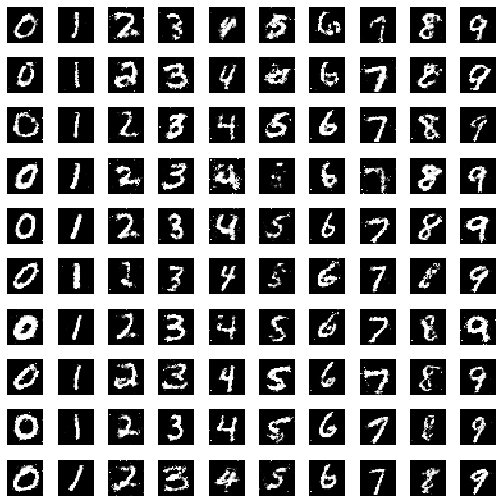

In [48]:
from torch.autograd import Variable
from showit import tile

cuda = True if torch.cuda.is_available() else False
FloatTensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if cuda else torch.LongTensor
n=10
latent_dim=100

z = Variable(FloatTensor(np.random.normal(0, 1, (n**2, latent_dim))))
labels = np.array([num for _ in range(n) for num in range(n)])

labels = Variable(LongTensor(labels))
out = trainer.generator(z,labels)

out = out.data.cpu().numpy().squeeze(axis=1)
tile(out);